In [1]:
import matplotlib
import numpy as np
import pandas as pd
import json
import seaborn as sns
import os.path
import datetime as dt
import matplotlib.pyplot as plt
from utility import get_spotify_data

In [2]:
def get_streaming_history():
    return get_spotify_data('StreamingHistory')

In [3]:
streaming_history = sorted(get_streaming_history(), key=lambda s: s['endTime'])[1:]

In [4]:
df = pd.DataFrame.from_records(data=streaming_history).convert_dtypes()
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-03-07 18:13,Johann Sebastian Bach,"Bach, J.S.: Brandenburg Concerto No. 5 in D Ma...",31018
1,2020-03-10 21:28,Austin Wintory,Temptations,236307
2,2020-03-11 00:03,Ace Waters,Nihilist (feat. ThunderScott),88040
3,2020-03-11 00:12,Ace Waters,Nihilist (feat. ThunderScott),3241
4,2020-03-11 00:18,Bart & Baker,J'veux du soleil (feat. Au P'tit Bonheur) [Gra...,368320


In [5]:
df['date'] = pd.to_datetime(df['endTime'], errors='raise').dt.date
df['week'] = pd.to_datetime(df['date']).dt.isocalendar().week
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

,endTime,artistName,trackName,msPlayed,date,week,year
0,2020-03-07 18:13,Johann Sebastian Bach,"Bach, J.S.: Brandenburg Concerto No. 5 in D Ma...",31018,2020-03-07,10,2020
1,2020-03-10 21:28,Austin Wintory,Temptations,236307,2020-03-10,11,2020
2,2020-03-11 00:03,Ace Waters,Nihilist (feat. ThunderScott),88040,2020-03-11,11,2020
3,2020-03-11 00:12,Ace Waters,Nihilist (feat. ThunderScott),3241,2020-03-11,11,2020
4,2020-03-11 00:18,Bart & Baker,J'veux du soleil (feat. Au P'tit Bonheur) [Gra...,368320,2020-03-11,11,2020


In [6]:
total_played_by_day = df.groupby('date').sum('msPlayed')
total_played_by_day['date'] = total_played_by_day.index
total_played_by_day['minsPlayed'] = total_played_by_day['msPlayed'] / 60000
# total_played_by_day['date_str'] = pd.to_datetime(total_played_by_day['date'], errors='raise').dt.strftime('%Y-%m-%d')
total_played_by_day.head()
# df['date']

,msPlayed,week,year,date,minsPlayed
date,,,,,
2020-03-07,31018,10,2020,2020-03-07,0.516967
2020-03-10,236307,11,2020,2020-03-10,3.93845
2020-03-11,48412299,5478,1005960,2020-03-11,806.87165
2020-03-12,43812644,2860,525200,2020-03-12,730.210733
2020-03-13,50691352,6589,1209980,2020-03-13,844.855867


[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

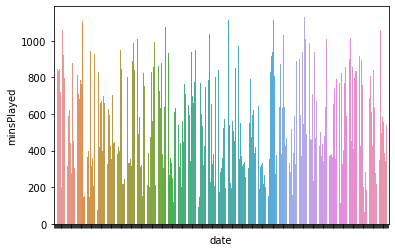

In [7]:
sns.barplot(data=total_played_by_day, x='date', y='minsPlayed', orient='v').set(xticklabels=[]) # total_played_by_day['date'][::10])



In [8]:
total_played_by_week = df.groupby(['year', 'week']).sum('msPlayed')
total_played_by_week['minsPlayed'] = total_played_by_week['msPlayed'] / 60000.0
total_played_by_week['hrsPlayed'] = total_played_by_week['minsPlayed'] / 60.0
total_played_by_week['propPlayed'] = total_played_by_week['hrsPlayed'] / (24.0 * 7)
total_played_by_week['week'] = total_played_by_week.index.get_level_values('week')
total_played_by_week.head()

msPlayed   minsPlayed  hrsPlayed  propPlayed week
year week                                                    
2020 10        31018     0.516967   0.008616    0.000051   10
     11    243792787  4063.213117  67.720219    0.403097   11
     12    288176509  4802.941817   80.04903    0.476482   12
     13    249157001  4152.616683  69.210278    0.411966   13
     14    252425985   4207.09975  70.118329    0.417371   14

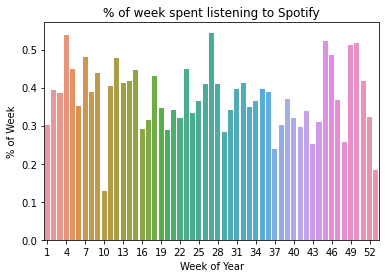

In [9]:
ax = sns.barplot(data=total_played_by_week, x='week', y='propPlayed', ci=None, orient='v')
ax.set(title='% of week spent listening to Spotify')
ax.set(xlabel='Week of Year', ylabel='% of Week')
xticks = ax.xaxis.get_major_ticks()
for i in range(1, len(xticks), 3):
    xticks[i].set_visible(False)
    if i + 1 < len(xticks):
        xticks[i+1].set_visible(False)
plt.show()